# Using Municipal Open Data to Analyze Councillor Voting Patterns
### by Mark M<sup>c</sup>Carthy

Many municipalities have open source data available on a very wide number of topics. For example, in Toronto th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print('pandas version = '+pd.__version__)
print('numpy version = '+np.__version__)

pandas version = 2.0.3
numpy version = 1.24.3


In [2]:
# need to grab attendance data for Toronto
dir_name = '/Users/markmccarthy/Documents/coding_fun/toronto_dsci/councillors/'
short_filenames = [
    'councillors-meeting-attendance-2022-2026.csv',
    'councillors-meeting-attendance-2018-2022.csv',
    'councillors-meeting-attendance-2014-2018.csv',
    'councillors-meeting-attendance-2010-2014.csv',
    'councillors-meeting-attendance-2006-2010.csv'
]
filenames = [dir_name + f for f in short_filenames] 

In [3]:
#The columns are consistent but the names are not. Let's fix that
col_names = ['_id', 'Term', 'FirstName', 'LastName', 'Committee', 'MTGNum', 'SessionDate', 'SessionType', 'SessionStart_EndTime', 'Present']

raw_attendance_df = pd.concat((pd.read_csv(f, header=0, names=col_names) for f in filenames), ignore_index=True)

In [4]:
raw_attendance_df.head()

,_id,Term,FirstName,LastName,Committee,MTGNum,SessionDate,SessionType,SessionStart_EndTime,Present
0,1,2022-2026,Paula,Fletcher,CreateTO,1,2022-11-18,Morning,09:31AM - 09:50AM,N
1,2,2022-2026,Paul,Ainslie,City Council,1,2022-11-23,Afternoon,14:03PM - 15:25PM,Y
2,3,2022-2026,Brad,Bradford,City Council,1,2022-11-23,Afternoon,14:03PM - 15:25PM,Y
3,4,2022-2026,Alejandra,Bravo,City Council,1,2022-11-23,Afternoon,14:03PM - 15:25PM,Y
4,5,2022-2026,Jon,Burnside,City Council,1,2022-11-23,Afternoon,14:03PM - 15:25PM,Y


In [5]:
raw_attendance_df.describe(include='all')

,_id,Term,FirstName,LastName,Committee,MTGNum,SessionDate,SessionType,SessionStart_EndTime,Present
count,8.653000e+04,86530,86530,86530,86530,86530.000000,86530,86530,86530,86530
unique,NaN,5,68,79,124,NaN,2178,3,5787,2
top,NaN,2010-2014,John,Crawford,City Council,NaN,2011-06-15,Afternoon,09:40AM - 12:30PM,Y
freq,NaN,31894,4878,2677,53409,NaN,495,38702,785,74956
mean,1.286318e+06,NaN,NaN,NaN,NaN,23.594695,NaN,NaN,NaN,NaN
std,5.415875e+05,NaN,NaN,NaN,NaN,15.156615,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,6.229502e+05,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
50%,1.371730e+06,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN
75%,1.814777e+06,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN


In [6]:
raw_attendance_df.isnull().any()

_id                     False
Term                    False
FirstName               False
LastName                False
Committee               False
MTGNum                  False
SessionDate             False
SessionType             False
SessionStart_EndTime    False
Present                 False
dtype: bool

In [7]:
attend_df = raw_attendance_df
attend_df['Name'] = attend_df['FirstName']+attend_df['LastName']
attend_df = attend_df.drop(columns = ['FirstName','LastName'])

attend_df['Present'] = np.where(attend_df['Present']=='Y', 1, 0)

#df = df.groupby(['Name','SessionType'])['Present'].agg(['count', 'sum'])
attend_df = attend_df.groupby('Name')['Present'].agg(['count', 'sum'])
attend_df['AttendancePercent'] = 100 * attend_df['sum'] / attend_df['count']
attend_df = attend_df.rename(columns={'count': 'TimesInvited', 'sum': 'TimesPresent'}).reset_index()
print(attend_df.sort_values(by=['AttendancePercent'],ascending=True))

                Name  TimesInvited  TimesPresent  AttendancePercent
27  GiorgioMammoliti          1571           980          62.380649
76         RonMoeser          1201           757          63.030808
64       MikeFeldman           184           117          63.586957
1      AdamGiambrone           190           131          68.947368
18       DavidMiller           197           137          69.543147
..               ...           ...           ...                ...
30         GordPerks          2167          2118          97.738809
3     AlejandraBravo           150           147          98.000000
4        AmberMorley           115           113          98.260870
80    StephenHolyday          1183          1176          99.408284
69        OliviaChow            15            15         100.000000

[83 rows x 4 columns]


In [8]:
final_df = attend_df.loc[attend_df['TimesInvited']>500].sort_values(by=['AttendancePercent'],ascending=True)
print(final_df)

                       Name  TimesInvited  TimesPresent  AttendancePercent
27         GiorgioMammoliti          1571           980          62.380649
76                RonMoeser          1201           757          63.030808
75                  RobFord           976           698          71.516393
35             JayeRobinson          1865          1405          75.335121
48        Justin J.Di Ciano           847           654          77.213695
54               MarkGrimes          1957          1537          78.538579
29       GloriaLindsay Luby           815           657          80.613497
74               RaymondCho          1255          1014          80.796813
58          MichaelThompson          2105          1718          81.615202
60     MichelleBerardinetti          1058           869          82.136106
70             PamMcConnell          1476          1213          82.181572
22                 DougFord           850           701          82.470588
49              KarenStin

In [9]:
final_df.describe()

,TimesInvited,TimesPresent,AttendancePercent
count,57.000000,57.000000,57.000000
mean,1429.333333,1240.035088,86.789685
std,565.251440,509.556178,7.345417
min,568.000000,539.000000,62.380649
25%,875.000000,757.000000,83.830846
50%,1379.000000,1213.000000,87.287025
75%,1865.000000,1552.000000,91.426109
max,2677.000000,2397.000000,99.408284


In [10]:
#Now to do voting data
city = 'toronto'
if city == 'toronto':
    short_filenames = [
        'member-voting-record-2022-2026.csv',
        'member-voting-record-2018-2022.csv',
        'member-voting-record-2014-2018.csv',
        'member-voting-record-2010-2014.csv',
        'member-voting-record-2006-2010.csv'
    ]
    filenames = [dir_name + f for f in short_filenames] 
elif city == 'calgary':
    filenames = [dir_name + 'Council_and_Committee_Votes_20231024.csv']

In [11]:
if city == 'toronto':
    raw_voting_df = pd.concat((pd.read_csv(f, index_col = '_id') for f in filenames), ignore_index=True)
elif city == 'calgary':
    raw_voting_df = pd.read_csv(filenames[0])
print(raw_voting_df.shape)
print(raw_voting_df.head())
print(raw_voting_df.describe())

(707546, 11)
        Term First Name Last Name     Committee Date/Time Agenda Item #  \
0  2022-2026       Paul   Ainslie  City Council       NaN    2023.FM1.8   
1  2022-2026       Brad  Bradford  City Council       NaN    2023.FM1.8   
2  2022-2026  Alejandra     Bravo  City Council       NaN    2023.FM1.8   
3  2022-2026        Jon  Burnside  City Council       NaN    2023.FM1.8   
4  2022-2026    Shelley   Carroll  City Council       NaN    2023.FM1.8   

                            Agenda Item Title             Motion Type Vote  \
0  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
1  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
2  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
3  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
4  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   

          Result                                   Vote Description

In [12]:
if False:
    # let's remove motions that seem fairly meaningless
    raw_voting_df['Motion Type'].value_counts()
    list_bad_motions = ['Extend Speaking Time','Adopt Minutes']
    #raw_voting_df.loc[raw_voting_df['Motion Type']=='Receive Item'].Vote.value_counts()
    print(raw_voting_df.shape[0])
    raw_voting_df = raw_voting_df.loc[raw_voting_df['Motion Type'].isin(list_bad_motions) == False]
    print(raw_voting_df.shape[0])

In [13]:
#Check the general data distribution before we try modelling it
raw_voting_df.Vote.value_counts()

Vote
Yes       507330
Absent    108378
No         91838
Name: count, dtype: int64

In [14]:
# Check for missing data
raw_voting_df.isnull().sum()

Term                      0
First Name                0
Last Name                 0
Committee                 0
Date/Time            678706
Agenda Item #             0
Agenda Item Title         0
Motion Type               0
Vote                      0
Result                    0
Vote Description          0
dtype: int64

In [15]:
if city == 'toronto':
    # Check which councillors missed votes
    voting_df = raw_voting_df.copy()
    voting_df['Absent'] = np.where(voting_df['Vote']=='Absent', 1, 0)
    voting_df = voting_df.groupby(['First Name','Last Name'])['Absent'].agg(['count', 'sum'])
    voting_df['AbsentPercent'] = 100 * voting_df['sum'] / voting_df['count']
    voting_df = voting_df.rename(columns={'count': 'EligibleVotes', 'sum': 'TimesAbsent'}).reset_index()
    print(voting_df)

   First Name  Last Name  EligibleVotes  TimesAbsent  AbsentPercent
0        A.A.      Heaps           1430          294      20.559441
1        Adam  Giambrone           1446          684      47.302905
2        Adam    Vaughan           8302          361       4.348350
3   Alejandra      Bravo            448            5       1.116071
4       Amber     Morley            410            4       0.975610
..        ...        ...            ...          ...            ...
87      Sarah   Doucette          12705          403       3.171980
88    Shelley    Carroll          15985         2034      12.724429
89    Stephen    Holyday           7545           12       0.159046
90      Suzan       Hall           1475           99       6.711864
91    Vincent   Crisanti          13233         2707      20.456435

[92 rows x 5 columns]


In [16]:
#Check which Motion Types are controversial and/or commonly skipped
voting_df2 = raw_voting_df.copy()
if city=='toronto':
    voting_df2 = voting_df2.groupby('Motion Type').apply(lambda x: pd.Series(dict(
        yes=(x.Vote=='Yes').sum(),
        no=(x.Vote=='No').sum(),
        absent=(x.Vote=='Absent').sum()
    )))
elif city =='calgary':   
    voting_df2 = voting_df2.groupby('MeetingType').apply(lambda x: pd.Series(dict(
        yes=(x.Vote=='Yes').sum(),
        no=(x.Vote=='No').sum(),
        absent=(x.Vote=='Absent').sum()
    )))
voting_df2['total']=voting_df2['yes']+voting_df2['no']+voting_df2['absent']
voting_df2['yes%']=100*voting_df2['yes']/voting_df2['total']
voting_df2['no%']=100*voting_df2['no']/voting_df2['total']
voting_df2['absent%']=100*voting_df2['absent']/voting_df2['total']

#voting_df2['AbsentPercent'] = 100 * voting_df2['sum'] / voting_df2['count']
#voting_df2 = voting_df2.rename(columns={'count': 'EligibleVotes', 'sum': 'TimesAbsent'}).reset_index()

print(voting_df2[['total','yes%','no%','absent%']].sort_values(by='no%'))

    

                                        total       yes%        no%    absent%
Motion Type                                                                   
Adopt Minutes                            1823  80.252331   0.274273  19.473396
Introduce Report                         3567  86.178862   0.476591  13.344547
Petition Filed                           3394  84.413671   0.589275  14.997054
Adopt Order Paper as Amended             4546  86.493621   0.945886  12.560493
Withdraw an Item                          989  85.338726   1.415571  13.245703
Interim Control By-law                    269  79.553903   1.486989  18.959108
Introduce and Pass Bills (Two-thirds)     490  69.795918   1.632653  28.571429
Adopt Order Paper                        4764  75.272880   1.910160  22.816961
Nomination of a Member                    322  95.341615   2.173913   2.484472
Excuse Absentees                         3384  77.925532   2.186761  19.887707
Introduce and Pass General Bills        13587  75.46

   First Name  Last Name  EligibleVotes  TimesAbsent  AbsentPercent
1        Adam  Giambrone           1446          684      47.302905
28    Giorgio  Mammoliti          14490         6774      46.749482
19      David     Miller           1402          583      41.583452
84        Ron     Moeser          12057         4799      39.802604
70       Mike    Feldman           1397          544      38.940587
..        ...        ...            ...          ...            ...
57       Lucy     Troisi           1372           26       1.895044
31       Gord      Perks          16912          226       1.336329
24       Doug    Holyday           6757           88       1.302353
39        Jim       Hart           1659           21       1.265823
89    Stephen    Holyday           7545           12       0.159046

[82 rows x 5 columns]
       EligibleVotes  TimesAbsent  AbsentPercent
count      82.000000    82.000000      82.000000
mean     8589.024390  1320.256098      15.459043
std      5971.

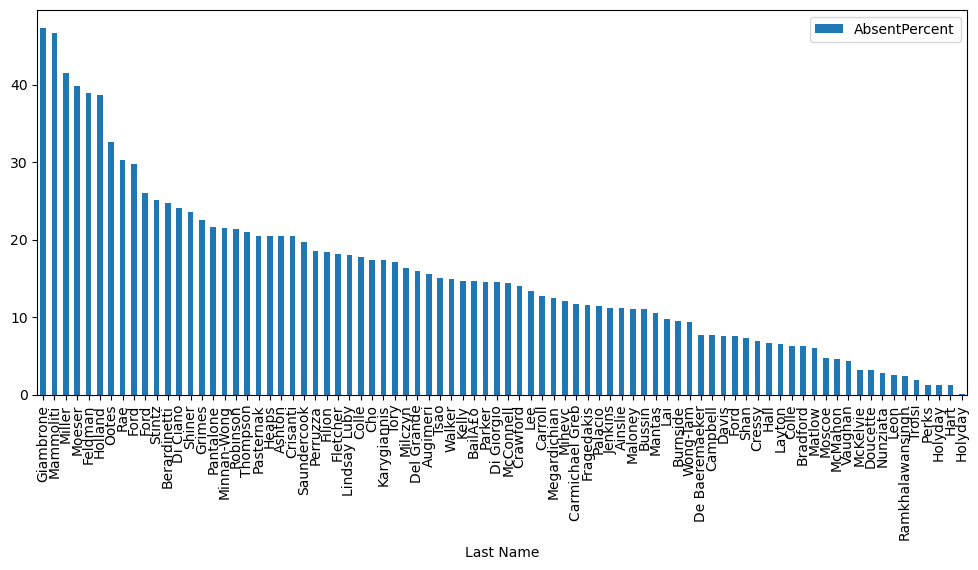

In [17]:
if city == 'toronto':
    #once more looking at absenteeism
    final_voting_df = voting_df.loc[voting_df['EligibleVotes']>500].sort_values(by=['AbsentPercent'],ascending=False).copy()
    print(final_voting_df)
    print(final_voting_df.describe())
    final_voting_df.plot(kind='bar',x='Last Name',y='AbsentPercent',figsize=(12,5))

In [18]:
if city == 'calgary':
    #print(raw_voting_df.loc[raw_voting_df['Voter'].str.contains('Gondek')].Voter.value_counts())
    #print(raw_voting_df.loc[raw_voting_df['Voter'].str.contains('Pootmans')].Voter.value_counts())
    #print(raw_voting_df.loc[raw_voting_df['Voter'].str.contains('Nenshi')].Voter.value_counts())
    #print(raw_voting_df.loc[raw_voting_df['Voter']=='. .'].Voter.value_counts())
    #print(raw_voting_df.loc[raw_voting_df['Vote']=='Absent'].Voter.value_counts())
    #print(clus_vote_df.loc[clus_vote_df['Name'].isin(list_of_councillors)==False].MeetingType.value_counts())
    print(raw_voting_df.loc[raw_voting_df['MeetingType'].str.contains('SPC')].Voter.value_counts())

In [19]:
#let's try clustering. First clean up the table a bit
clus_vote_df = raw_voting_df.copy()
if city == 'toronto':
    clus_vote_df = clus_vote_df.drop(columns='Date/Time').drop_duplicates()
    clus_vote_df['Name'] = clus_vote_df['First Name'] + ' ' + clus_vote_df['Last Name']
    clus_vote_df = clus_vote_df.drop(columns = ['First Name','Last Name'])
    #clus_vote_df = clus_vote_df.rename(columns={'Vote Description': 'Desc'})
elif city == 'calgary':
    clus_vote_df = clus_vote_df.loc[clus_vote_df['MeetingType'].str.contains('Council')]
    clus_vote_df = clus_vote_df.replace({'Mayor J. Gondek':'Jyoti Gondek',
                                         'Mayor N. Nenshi':'Naheed Nenshi',
                                         'Richard Pootmans':'John (Richard) Pootmans'})
    clus_vote_df = clus_vote_df.rename(columns={'Voter': 'Name'})
    clus_vote_df = clus_vote_df[clus_vote_df.Name != '. .']
    #list_of_councillors = clus_vote_df.Name.unique()
    #print(list_of_councillors)
    
print(clus_vote_df.head())
print(clus_vote_df.shape)

        Term     Committee Agenda Item #  \
0  2022-2026  City Council    2023.FM1.8   
1  2022-2026  City Council    2023.FM1.8   
2  2022-2026  City Council    2023.FM1.8   
3  2022-2026  City Council    2023.FM1.8   
4  2022-2026  City Council    2023.FM1.8   

                            Agenda Item Title             Motion Type Vote  \
0  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
1  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
2  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
3  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   
4  Election of the Speaker and Deputy Speaker  Nomination of a Member  Yes   

          Result                                   Vote Description  \
0  Carried, 25-1  Majority required - Appoint Councillor Nunziat...   
1  Carried, 25-1  Majority required - Appoint Councillor Nunziat...   
2  Carried, 25-1  Majority required - Appoint Council

In [20]:
# Get ready to pivot
col_list = clus_vote_df.columns.drop(['Name','Vote']).to_list()
#print(col_list)
temp_df = clus_vote_df.groupby(col_list).size().reset_index().drop(columns=0).reset_index().rename(columns={'index':'vote_id'})
merge_df = pd.merge(left = temp_df, right = clus_vote_df, on = col_list, how='left')
merge_df = merge_df.drop(columns=col_list).drop_duplicates(subset=['vote_id','Name'])#This means something went wrong?


In [21]:
merge_df = merge_df.pivot(index='vote_id', columns='Name', values='Vote')
print(merge_df)

Name    A.A. Heaps Adam Giambrone Adam Vaughan Alejandra Bravo Amber Morley  \
vote_id                                                                       
0           Absent            NaN          Yes             NaN          NaN   
1           Absent            NaN          Yes             NaN          NaN   
2              Yes            NaN          Yes             NaN          NaN   
3              Yes            NaN          Yes             NaN          NaN   
4              NaN            NaN          NaN             NaN          NaN   
...            ...            ...          ...             ...          ...   
19039          NaN            NaN          NaN             Yes          NaN   
19040          NaN            NaN          NaN             Yes          NaN   
19041          NaN            NaN          NaN             Yes          NaN   
19042          NaN            NaN          NaN             Yes          NaN   
19043          NaN            NaN          NaN      

# heading?
## smaller heading?
Ordinary text?
`code here?` 
$$c = \sqrt{a^2 + b^2}$$

In [22]:
# let's try to invent a clusterer that meets our problem since it's tough to find a good one in the wild
# we definitely want to evaluate merge_df= merge_df.replace('Absent',np.NaN)

# We need to define some sort of "distance" or "dissimilarity" matrix
# This begins by seeking the 'dissimilarity' between two councillors
# Not enough to just add up the times they disagreed... we need (two of) disagreements and agreements and total
# There should also be a way to distinguish 5 dis + 1 agg vs 500 dis + 1 agg. The first situation is less confidently disagreeing
# let d = disagreements, a=agreements, n=d+a
# we can say dissimiliarity = D = d/n
# s(D) = sqrt((dD/dd)^2*(s(d))^2+(dD/dn)^2*(s(n))^2 + 2*(dD/dd)*(dD/dn)*s(d,n))
#      = d/n*sqrt((s(d)/d)^2+(s(n)/n)^2 - 2*s(d,n)/(d*n))
# with n ~ poisson(n^=n), s(n) = sqrt(n); d ~ binomial(n^=n,p^=d/n), s(d)=sqrt(n*p*(1-p))=sqrt(d*(1-d/n))
# s(d,n) = E[d*n] - E[d]*E[n] = E[d*n] - d*n

# okay, that's getting cray-cray. Googling here says:https://stats.stackexchange.com/questions/191444/variance-in-estimating-p-for-a-binomial-distribution
# s(D) = sqrt(D*(1-D)/n), D=d/n
# but that has issues when d=0, n!=0 or when d=n!=0
# wiki says: use beta distribution for D (p), so now we have;
# D = d+alpha/(n+alpha+beta) = n-a+alpha/(n+alpha+beta)
# with alpha=beta=1, beta becomes uniform distribution, so that seems a good uniform prior
# D = d+1/(n+2)
# this is hiding our bayesian updating of alpha' = alpha+d, beta' = beta+a = beta+n-d
# D^ = alpha'/(alpha'+beta') = d+alpha/(alpha+d+beta+n-d) = d+1/(n+2)
# s(D)= sqrt(variance of beta dist with alpha' = alpha+d, beta' = beta+n-d)
#     = sqrt(alpha'*beta'/((alpha'+beta')^2*(alpha'+beta'+1)))
# s(D)^2 = (d+1)*(n-d+1)/((n+2)^2*(n+3))
#    num = nd-d^2+d+n-d+1 = -d^2+nd+n+1

# So now we have some symmetric matrix D where we have entries of D_ij and s(D)_ij
# We want to cluster such that sum(D_ij) is minimized with i,j in the same cluster, and all i belong to a cluster
# Ward linkage agglomerative clustering minimizes sum(D_ij^2) when merging clusters
# Since we have uncertainties, lets weight using w_ij=1/(s(D)_ij)^2, and minimize sum(w_ij*(D_ij)^2)
# Overall "unexplainability" would be sum(sum(w_ij*(D_ij)^2), all clusters) and this can help us decide when to stop clustering
# does sum(w_ij*(D_ij)^2) = sum((D_ij/sD_ij)^2) make sense? 
# test1, 1 cluster 4 points: a = (highD,highsD), b=(highD,lowsD), c=(lowD,highsD), d=(lowD,lowsD)
#   Here we want to merge c first?? shouldn't we grab d first?
# I think we want weighted mean formula, applied to D, so we want to minimize within each cluster, for points ij in the cluster:
# avg_D = sum(w_ij*D_ij)/sum(w_ij)
# since I bet it'll be needed when estimating n_clusters, let's grab the s_avg_D too
# s_avg_D^2 = v_avg_D = 1/sum(w_ij)
# these formulae will probably simplify a bunch if we normalize w_ij' = w_ij / sum(w_ij) 
# ... It's worth it when looking at grabbing which point to add to cluster, but we can't compare clusters with diff normalizations
# avg_D' = sum(w_ij'*D_ij)
# v_avg_D' = 1
# To check 'unexplainability' we evaluate sum(w_avg*avg_D)/sum(w_avg) where w_avg = 1/v_avg_D = sum(w_ij)
# unexp = sum(sum(w_ij)*sum(w_ij*D_ij)/sum(w_ij),clusters)/sum(sum(w_ij),clusters)
#       = sum(sum(w_ij*D_ij),clus)/sum(sum(w_ij),clus)
# every time we merge a cluster, we want to minimize unexp to know which two clusters to merge
# This isn't really separable into sum(x, all clus - 2)+sum(x,new clus), thanks to denominator.
# can we set sum(sum(w_ij),clus) = 1 and somehow always have that true?
# yes, if sum(w_ij, all data points)=1 then sum(sum(w_ij),clus) = 1 ... w_ij are distances, does this make sense? Still yes.

# How do we check which clusters to merge?
# We could evaluate a favoured other cluster to merge for each cluster, then see which cluster's fave is best to merge
# It's another pair-wise triangular matrix thing, with clusters for axes.
# unexp = sum(sum(w_ij'*D_ij),clus)
#       = sum(sum(w_ij'*D_ij),all clus but 2) + sum(sum(w_ij'*D_ij),new clus)
# so we want to store sum(w_ij'*D_ij) for all existing clusters and sum(w_ij'*D_ij) for all pairs of clusters?
# can we take shortcuts? need to be able to determine if ue_k is smaller/larger without doing full sum(w_ij'*D_ij)
# if I merge clusters A & B, can I say something about ABC based on AC and BC?
# ue_abc >? max(ue_ab,ue_ac)
# yes, that's definitely true, these are sums, and ue_abc just adds more terms
# similarly ue_ab > max(ue_a,ue_b) ... infact ue_ab > ue_a + ue_b
# what if shared terms? ue_abc >? sum(ue_ab,ue_ac) ... let's pretend ue_a has some huge terms
# ue_abc >? ue_a + ue_b + ue_a + ue_c ... This doesn't look guaranteed to be true, only ue_abc > ue_a + ue_b + ue_c
# So we calc all ue_m, then starting with the smallest ue_m, ue_n we calc ue_mn, and 
# stop when ue_mn smaller than smallest uncalced ue_a+ue_b
# then we remove m, n, replace with mn, then repeat as if mn is just one letter.
# if ue_mn > next smallest ue_op, we can just merge ue_op right away? Only if ue_op is also smaller than uncalced ue_a+ue_b
# after every? merge we can calc ue_tot = sum(ue_k, all extant clusters)
# plot ue_tot(n_clus) for all clus#, and elbow method?



#first get dissimilarity matrix
init_df= merge_df.replace('Absent',np.NaN).copy()

all_cols = init_df.columns
rem_cols = init_df.columns
d_df = pd.DataFrame(columns = all_cols, index = all_cols, dtype = int)
for col1 in all_cols:
    rem_cols = rem_cols.drop(col1)
    for col2 in rem_cols:
        #use a, not d, since != becomes true when either councillor votes "NaN". Simpler to code
        d_df.at[col1,col2] = len(init_df.loc[init_df[col1].notnull() & init_df[col2].notnull() & (init_df[col1] != init_df[col2])])
        #d_df.at[col2,col1] = d_df.at[col1,col2]
        
print(d_df)

Name              A.A. Heaps  Adam Giambrone  Adam Vaughan  Alejandra Bravo  \
Name                                                                          
A.A. Heaps               NaN            66.0         130.0              0.0   
Adam Giambrone           NaN             NaN          90.0              0.0   
Adam Vaughan             NaN             NaN           NaN              0.0   
Alejandra Bravo          NaN             NaN           NaN              NaN   
Amber Morley             NaN             NaN           NaN              NaN   
...                      ...             ...           ...              ...   
Sarah Doucette           NaN             NaN           NaN              NaN   
Shelley Carroll          NaN             NaN           NaN              NaN   
Stephen Holyday          NaN             NaN           NaN              NaN   
Suzan Hall               NaN             NaN           NaN              NaN   
Vincent Crisanti         NaN             NaN        

In [23]:
# Here we trim out all data with less than 100 common votes

rem_cols = init_df.columns
n_df = pd.DataFrame(columns = all_cols, index = all_cols, dtype = int)
for col1 in all_cols:
    rem_cols = rem_cols.drop(col1)
    for col2 in rem_cols:
        val = len(init_df.loc[init_df[col1].notnull() & init_df[col2].notnull()])
        n_df.at[col1,col2] = val if val >= 100 else np.NaN
        #n_df.at[col2,col1] = n_df.at[col1,col2]
        
n_df = n_df.replace(0,np.NaN)
print(n_df)    

Name              A.A. Heaps  Adam Giambrone  Adam Vaughan  Alejandra Bravo  \
Name                                                                          
A.A. Heaps               NaN           627.0        1064.0              NaN   
Adam Giambrone           NaN             NaN         743.0              NaN   
Adam Vaughan             NaN             NaN           NaN              NaN   
Alejandra Bravo          NaN             NaN           NaN              NaN   
Amber Morley             NaN             NaN           NaN              NaN   
...                      ...             ...           ...              ...   
Sarah Doucette           NaN             NaN           NaN              NaN   
Shelley Carroll          NaN             NaN           NaN              NaN   
Stephen Holyday          NaN             NaN           NaN              NaN   
Suzan Hall               NaN             NaN           NaN              NaN   
Vincent Crisanti         NaN             NaN        

In [24]:
D_df=(d_df+1)/(n_df+2)
print(D_df)

Name              A.A. Heaps  Adam Giambrone  Adam Vaughan  Alejandra Bravo  \
Name                                                                          
A.A. Heaps               NaN        0.106518      0.122889              NaN   
Adam Giambrone           NaN             NaN      0.122148              NaN   
Adam Vaughan             NaN             NaN           NaN              NaN   
Alejandra Bravo          NaN             NaN           NaN              NaN   
Amber Morley             NaN             NaN           NaN              NaN   
...                      ...             ...           ...              ...   
Sarah Doucette           NaN             NaN           NaN              NaN   
Shelley Carroll          NaN             NaN           NaN              NaN   
Stephen Holyday          NaN             NaN           NaN              NaN   
Suzan Hall               NaN             NaN           NaN              NaN   
Vincent Crisanti         NaN             NaN        

In [25]:
# s(D)^2 = (d+1)*(n-d+1)/((n+2)^2*(n+3))
#    num = nd-d^2+d+n-d+1 = -d^2+nd+n+1
# these nums are pretty small, like 0.000019. Are we having precision issues?
# They're all float64, so probably not.
w_df = 1/((d_df+1)*(n_df-d_df+1)/((n_df+2)**2*(n_df+3)))
#w_D_df = w_D_df / (w_D_df.sum().sum())
#print(w_D_df)
#print(v_D_df.dtypes)

In [26]:
def weightedVariance(input_vals, sd=False):
    vals = [x[0] for x in input_vals]
    if sd:
        weights = [(1/(x[1])**2) for x in input_vals]
    else:
        weights = [x[1] for x in input_vals]
    mean = weightedMean(input_vals, sd)
    num = 0
    denom = 0
    for v,w in zip(vals, weights):
        num += w*((v-mean)**2)
        denom += w
    return num/denom
        
def weightedMean(input_vals, sd=False):
    weights = []
    vals = [x[0] for x in input_vals]
    num = 0
    denom = 0
    if sd:
        weights = [(1/(x[1])**2) for x in input_vals]
    else:
        weights = [x[1] for x in input_vals]

    for v,w in zip(vals, weights):
        num += v*w
        denom += w
        
    return num/denom
    
def weightedMeanWithStd(input_vals, sd=False):
    weights = []
    vals = [x[0] for x in input_vals]
    num = 0
    denom = 0
    if sd:
        weights = [(1/(x[1])**2) for x in input_vals]
    else:
        weights = [x[1] for x in input_vals]

    for v,w in zip(vals, weights):
        num += v*w
        denom += w
        
    return (num/denom, denom if sd==False else (1/denom)**(0.5))

In [27]:
def imputeMissings(clus_df, wclus_df):
    #this function alters clus_df and w_df
    #it'll be slow, but considering how complex the process is, I'm not sure how to make it faster!
    
    i=0
    while clus_df.isna().sum().sum() > 0:
        print(f'in while loop, i={i}')
        i+=1
        # find array locations of all missing elements
        nans = np.where(clus_df != clus_df)
        print(f'--There are {len(nans[0])} nans')
        
        j=0
        #iterate through missings and find where the two unconnected nodes have a node in common
        for nans_row, nans_col in zip(nans[0],nans[1]):
            if j%100 == 0:
                print(f'processed {j} nans')
            j+=1
            if clus_df.iat[nans_row,nans_col] == clus_df.iat[nans_row,nans_col]:
                #print(f'skipping ({nans_row},{nans_col}) because its filled with {clus_df.iat[nans_row,nans_col]}')
                #this can happen because of the symmetrization
                continue
            nan_row_options = clus_df.iloc[nans_row].dropna().index
            nan_col_options = clus_df.iloc[:,nans_col].dropna().index
            connections = np.intersect1d(nan_row_options,nan_col_options)
            
            #print(f'This nan has {len(connections)} connections')
            
            # if no nodes in common, move on. Eventually should get everyone unless data unclusterable somehow
            if len(connections)==0:
                continue

            #if there are multiple common nodes, we want to loop over them and take an average
            # the agreement value for each common node connection is a product of the agreements
            vals = []
            for c in connections:
                d_ab = clus_df.iloc[nans_row][c]
                d_bc = clus_df.iloc[:,nans_col][c]
                d_ac = 1-(1-d_ab)*(1-d_bc)
                w_ab = wclus_df.iloc[nans_row][c]
                w_bc = wclus_df.iloc[:,nans_col][c]
                w_ac = 1/(d_ac**2*(1/((1-d_ab)**2*w_ab)+1/((1-d_bc)**2*w_bc)))
                vals.append((d_ac,w_ac))
            val = weightedMean(vals)
            # We want the stdev of the distribution, not of the mean, so no val[1]
            w_val = 1/weightedVariance(vals)
            
            #fill in our dataframes with the results, don't forget to keep symmetric!
            clus_df.iat[nans_row,nans_col] = val
            clus_df.iat[nans_col,nans_row] = val
            wclus_df.iat[nans_row,nans_col] = w_val
            wclus_df.iat[nans_col,nans_row] = w_val    
    return

In [28]:
#import os  
os.makedirs('intermediates', exist_ok=True) 

# to impute, we can find a distance that jumps between multiple councillors

#make final cluster-cluster strain matrix
D_imp_df = D_df.copy()
D_imp_df.index = range(0,len(D_imp_df.columns))
D_imp_df.columns = range(0,len(D_imp_df.columns))
w_imp_df = w_df.copy()
w_imp_df.index = range(0,len(w_imp_df.columns))
w_imp_df.columns = range(0,len(w_imp_df.columns))


#make symmetric 
rem_cols = D_imp_df.columns.copy()
for col1 in D_imp_df.columns:
    rem_cols.drop(col1)
    for col2 in rem_cols:
        D_imp_df.at[col2,col1] = D_imp_df.at[col1,col2]
        w_imp_df.at[col2,col1] = w_imp_df.at[col1,col2]

#remove councillors with no entries
drop_cols = D_imp_df.columns[D_imp_df.notna().any() == False]
print(drop_cols)
D_imp_df = D_imp_df.drop(drop_cols, axis = 0).drop(drop_cols, axis = 1) #clus_df.dropna(axis=1, how='all').dropna(axis=0, how='all')
w_imp_df = w_imp_df.drop(drop_cols, axis = 0).drop(drop_cols, axis = 1)

#set trace to 0
for col1 in D_imp_df.columns:
    D_imp_df.at[col1,col1]=0

#print(clus_df)
#print(wclus_df)

imputeMissings(D_imp_df, w_imp_df)

print(D_imp_df)
print(w_imp_df)

 
D_imp_df.to_csv('intermediates/D_imp_df.csv')
w_imp_df.to_csv('intermediates/w_imp_df.csv') 

Index([75, 85], dtype='int64')
in while loop, i=0
--There are 2848 nans
processed 0 nans
processed 100 nans
processed 200 nans
processed 300 nans
processed 400 nans
processed 500 nans
processed 600 nans
processed 700 nans
processed 800 nans
processed 900 nans
processed 1000 nans
processed 1100 nans
processed 1200 nans
processed 1300 nans
processed 1400 nans
processed 1500 nans
processed 1600 nans
processed 1700 nans
processed 1800 nans
processed 1900 nans
processed 2000 nans
processed 2100 nans
processed 2200 nans
processed 2300 nans
processed 2400 nans
processed 2500 nans
processed 2600 nans
processed 2700 nans
processed 2800 nans
          0         1         2         3         4         5         6   \
0   0.000000  0.106518  0.122889  0.148769  0.235809  0.208647  0.179457   
1   0.106518  0.000000  0.122148  0.168211  0.227325  0.202539  0.170472   
2   0.122889  0.122148  0.000000  0.191822  0.253236  0.119743  0.130206   
3   0.148769  0.168211  0.191822  0.000000  0.115385  0.

In [29]:
# How do we check which clusters to merge?
# We could evaluate a favoured other cluster to merge for each cluster, then see which cluster's fave is best to merge
# It's another pair-wise triangular matrix thing, with clusters for axes.
# unexp = sum(sum(w_ij'*D_ij),clus)
#       = sum(sum(w_ij'*D_ij),all clus but 2) + sum(sum(w_ij'*D_ij),new clus)
# so we want to store sum(w_ij'*D_ij) for all existing clusters and sum(w_ij'*D_ij) for all pairs of clusters?
# can we take shortcuts? need to be able to determine if ue_k is smaller/larger without doing full sum(w_ij'*D_ij)
# if I merge clusters A & B, can I say something about ABC based on AC and BC?
# ue_abc >? max(ue_ab,ue_ac)
# yes, that's definitely true, these are sums, and ue_abc just adds more terms
# similarly ue_ab > max(ue_a,ue_b) ... infact ue_ab > ue_a + ue_b
# what if shared terms? ue_abc >? sum(ue_ab,ue_ac) ... let's pretend ue_a has some huge terms
# ue_abc >? ue_a + ue_b + ue_a + ue_c ... This doesn't look guaranteed to be true, only ue_abc > ue_a + ue_b + ue_c
# So we calc all ue_m, then starting with the smallest ue_m, ue_n we calc ue_mn, and 
# stop when ue_mn smaller than smallest uncalced ue_a+ue_b
# then we remove m, n, replace with mn, then repeat as if mn is just one letter.
# if ue_mn > next smallest ue_op, we can just merge ue_op right away? Only if ue_op is also smaller than uncalced ue_a+ue_b
# after every? merge we can calc ue_tot = sum(ue_k, all extant clusters)
# plot ue_tot(n_clus) for all clus#, and elbow method?

In [30]:
if False:
    #this is a test cell
    clus_df = pd.DataFrame({0: [np.NaN, np.NaN, np.NaN,np.NaN], 1: [1, np.NaN, np.NaN,np.NaN], 2:[1.5,0.7,np.NaN,np.NaN],3:[1.2,0.2,np.NaN,np.NaN]},)

    rem_cols = clus_df.columns.copy()
    for col1 in clus_df.columns:
        clus_df.at[col1,col1]=0
        #print(f'rem_cols={rem_cols}, col1={col1}')
        rem_cols.drop(col1)
        #print(f'rem_cols={rem_cols}')
        for col2 in rem_cols:
            clus_df.at[col2,col1] = clus_df.at[col1,col2]

    print(clus_df)
    orig_clus_df = clus_df.copy()

    iClus=0;
    for col in clus_df.columns:
        clusters[iClus] = ([col],0)
        iClus+=1

    nClus_to_unexp = {}

    while len(clus_df.columns) >1:
        min_row = clus_df.min().idxmin()
        #if min_row
        min_col = clus_df[min_row].idxmin()
        print(f'min_row={min_row} or {clusters[min_row][0]}, min_col={min_col} or {clusters[min_col][0]}')
        new_cluster_elems = clusters[min_row][0] + clusters[min_col][0]
        strain = getStrain(new_cluster_elems,orig_clus_df)
        clusters[iClus] = (new_cluster_elems, strain)
        print(f'{clusters[min_row][0]}+{clusters[min_col][0]}={new_cluster_elems} with {strain},{clus_df.min().min()}')

        clus_df.loc[iClus] = (clus_df.loc[min_row].fillna(0) + clus_df.loc[min_col].fillna(0)).replace(0,np.NaN)
        clus_df[iClus] = (clus_df[min_row].fillna(0) + clus_df[min_col].fillna(0)).replace(0,np.NaN)
        clus_df.at[iClus,iClus] = np.NaN
        print(clus_df)
        clus_df = clus_df.drop(min_row, axis=0).drop(min_row, axis=1).drop(min_col, axis=0).drop(min_col, axis=1)
        print(clus_df)
        iClus+=1
    print(clusters)

In [31]:
# strain where cluster variance gives strain
def getStrain(cols, D_df, w_df):
    n = len(cols)
    if n == 1:
        return 0
    
    num = 0
    denom = 0
    
    rem_cols = cols.copy()
    for col1 in cols:
        rem_cols.remove(col1)
        for col2 in rem_cols:
            v = D_df.at[col1,col2]
            w = w_df.at[col1,col2]
            if v != v:
                v = D_df.at[col2,col1]
                w = w_df.at[col2,col1]
            if v != v:
                continue
            num += w*v**2
            denom += w
            
    if denom != denom:
        return np.NaN
    return num
    
# strain where cluster Avg gives strain
def getStrainAvg(cols, D_df, w_df):
    n = len(cols)
    if n == 1:
        return 0
    
    num = 0
    denom = 0
    
    rem_cols = cols.copy()
    for col1 in cols:
        rem_cols.remove(col1)
        for col2 in rem_cols:
            v = D_df.at[col1,col2]
            w = w_df.at[col1,col2]
            if v != v:
                v = D_df.at[col2,col1]
                w = w_df.at[col2,col1]
            if v != v:
                continue
            num += w*v
            denom += w
            
    if denom != denom:
        return np.NaN
    return num/denom

In [32]:
# Strain, but the old way with avg dissimilarities
def getStrainOld(cols, wD_df, w_df):
    #print(f'getting strain for cols={cols}')
    tot_strain_num = 0
    tot_strain_denom = 0
    if len(cols) == 1:
        return 0
    rem_cols = cols.copy()
    for col1 in cols:
        #print(f'rem_cols={rem_cols}, col1={col1}')
        rem_cols.remove(col1)
        #print(f'rem_cols={rem_cols}')
        for col2 in rem_cols:
            #print(f'adding strain at ({col1},{col2})={wD_df.at[col1,col2]}, ({col2},{col1})={wD_df.at[col2,col1]}')
            strain = wD_df.at[col1,col2]/w_df.at[col1,col2]
            tot_strain_num += wD_df.at[col1,col2]/w_df.at[col1,col2]#strain if strain == strain else 0
            tot_strain_denom += 1/w_df.at[col1,col2]
            
            #strain = wD_df.at[col2,col1]
            #tot_strain+= strain if strain == strain else 0
    #print(tot_strain)
    return tot_strain_num/tot_strain_denom
    

In [33]:
#vals = [(10,2),(11,2),(9,3)]
#vals_with_w = [(val[0],1/(val[1])**2) for val in vals]
#print(vals_with_w)
#print([(val[0]) for val in vals])
#variance = np.sum([(val[0])**2 for val in vals])/len(vals)
#print(variance)
#variance = np.sum([(val[0])**2*val[1] for val in vals_with_w])/np.sum([val[1] for val in vals_with_w])
#print(variance)
#vals_with_w.append((5,3))
#variance = np.sum([(val[0])**2*val[1] for val in vals_with_w])/np.sum([val[1] for val in vals_with_w])
#print(variance)

In [34]:
# agglomerative clustering based on variance

councillor_list = D_df.columns.to_list()
id_to_name = dict(zip(range(0,len(councillor_list)),councillor_list))

clus_df = D_imp_df.copy()
#unfortunately we have to set the diagonal to NaN so we can take the min later and not grab the diagonal
for col1 in clus_df.columns:
    clus_df.at[col1,col1]=np.NaN

#make initial clusters of 1 councillor per cluster
#clusters_id is of the form {cluster_id : ([list of councillor_ids],strain)}
clusters_id = {}
for col in clus_df.columns:
    clusters_id.update({col:([col],0)})

    
nClus_to_unexp = {}
clus_timeline = {}
    
#this is the 'unexplainability' with the current number of clusters
nClus_to_unexp[len(clus_df.columns)] = 0
clus_timeline[len(clus_df.columns)] = clus_df.columns

while len(clus_df.columns)>2:
    min_row = clus_df.min().idxmin()
    if min_row!=min_row:
        break
    min_col = clus_df[min_row].idxmin()
    if min_col!=min_col:
        break
    
    #make a new cluster
    new_cluster_elems = clusters_id[min_row][0] + clusters_id[min_col][0]
    strain = clus_df.at[min_row,min_col]
    new_clus_id = clus_df.columns.max() + 1
    clusters_id.update({new_clus_id:(new_cluster_elems, strain)})
    
    # some debugging output
    print(f'min_row={min_row}, min_col={min_col}')
    print(f'{clusters_id[min_row][0]}+{clusters_id[min_col][0]}={new_cluster_elems} with {strain},{clus_df.min().min()}')
    
    #drop the clusters that are merging from clus_df
    clus_df = clus_df.drop(min_row, axis=0).drop(min_row, axis=1).drop(min_col, axis=0).drop(min_col, axis=1)
    
    #add the new cluster to clus_df
    new_row = [getStrain(new_cluster_elems+clusters_id[clus_id][0],D_imp_df,w_imp_df) for clus_id in clus_df.columns.to_list()]
    #print(new_row)
    clus_df.loc[new_clus_id] = new_row
    #now add the column, with the last element being the diagonal, so therefore NaN
    new_row.append(np.NaN)
    clus_df[new_clus_id] = new_row #or clus_df.loc[:,new_clus_id] ?
    
    #update our metrics
    nClus_to_unexp[len(clus_df.columns)] = np.sum([clusters_id[clus_id][1] for clus_id in clus_df.columns])
    clus_timeline[len(clus_df.columns)] = clus_df.columns
    
    
print(clus_df)


min_row=13, min_col=42
[13]+[42]=[13, 42] with 0.02358490566037736,0.02358490566037736
min_row=27, min_col=34
[27]+[34]=[27, 34] with 0.025096525096525095,0.025096525096525095
min_row=38, min_col=47
[38]+[47]=[38, 47] with 0.03345159655347187,0.03345159655347187
min_row=3, min_col=7
[3]+[7]=[3, 7] with 0.03902439024390244,0.03902439024390244
min_row=12, min_col=91
[12]+[91]=[12, 91] with 0.04078533463499295,0.04078533463499295
min_row=49, min_col=63
[49]+[63]=[49, 63] with 0.042682926829268296,0.042682926829268296
min_row=5, min_col=9
[5]+[9]=[5, 9] with 0.045845272206303724,0.045845272206303724
min_row=41, min_col=71
[41]+[71]=[41, 71] with 0.04821308159136885,0.04821308159136885
min_row=0, min_col=31
[0]+[31]=[0, 31] with 0.048938134810710986,0.048938134810710986
min_row=60, min_col=76
[60]+[76]=[60, 76] with 0.05314571461797883,0.05314571461797883
min_row=54, min_col=72
[54]+[72]=[54, 72] with 0.05686936936936937,0.05686936936936937
min_row=2, min_col=87
[2]+[87]=[2, 87] with 0.0595

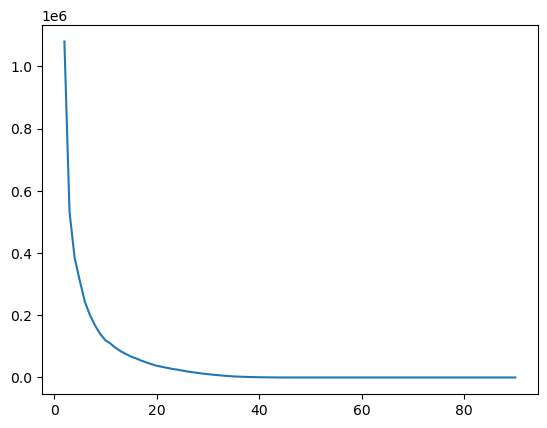

In [35]:
plt.plot(nClus_to_unexp.keys(),nClus_to_unexp.values())

In [42]:
def getNamesInClusters(clus_ids, clusters, id_to_name):
    cur_clusters = [clusters[clus_id][0] for clus_id in clus_ids]
    #for clus in cur_clusters:
    #    clus_names = [id_to_name[x] for x in clus]
    return [[id_to_name[x] for x in clus] for clus in cur_clusters]

final_clusters = getNamesInClusters(clus_timeline[10],clusters_id,id_to_name)
for i, clus in enumerate(final_clusters):
    string = ''
    for name in clus:
        if name is clus[-1]:
            string += name
        else:
            string += name + ', '
    
    print(i+1,string)

1 John Campbell, Rob Ford, Doug Ford, Doug Holyday, Jim Karygiannis, Mike Colle
2 Mike Del Grande, Norman Kelly, Mark Grimes, Nick Mantas, Justin J. Di Ciano, Michelle Holland
3 Anthony Perruzza, Raymond Cho, David Miller, Glenn De Baeremaeker, Maria Augimeri, Miganoush Megardichian, Amber Morley, Jamaal Myers
4 Denzil Minnan-Wong, John Parker, Jonathan Tsao, Michael Thompson, David Shiner, Mike Feldman
5 A.A. Heaps, Gord Perks, Robin Buxton Potts, Shelley Carroll, Adam Giambrone, Janet Davis, Chris Moise, Dianne Saxe, Kristyn Wong-Tam, Neethan Shan, Howard Moscoe, Sandra Bussin
6 Ron Moeser, Suzan Hall, Josh Matlow, Lily Cheng, Jim Hart, Paul Ainslie, Gary Crawford, James Maloney, Joe Pantalone, Kyle Rae
7 Jon Burnside, Josh Colle, Jennifer McKelvie, John Tory, Gloria Lindsay Luby, Peter Leon, Chin Lee, Michelle Berardinetti, Ana BailÃ£o, Brad Bradford, Brian Ashton, Case Ootes
8 Cesar Palacio, Vincent Crisanti, Cynthia Lai, Frances Nunziata, James Pasternak, Karen Stintz, Christin Ca

In [37]:
#old clustering based on avg dissimilarity
if False:
    #make initial clusters of 1 councillor per cluster
    clusters = {}
    iClus=0;
    for col in wD_df.columns:
        clusters[iClus] = ([col],0)
        iClus+=1

    nClus_to_unexp = {}
    clus_timeline = {}

    #make final cluster-cluster strain matrix
    clus_df = wD_df.copy()
    clus_df.index = range(0,len(wD_df.columns))
    clus_df.columns = range(0,len(wD_df.columns))

    #make symmetric & set trace to 0
    rem_cols = clus_df.columns.copy()
    for col1 in clus_df.columns:
        clus_df.at[col1,col1]=0
        rem_cols.drop(col1)
        for col2 in rem_cols:
            clus_df.at[col2,col1] = clus_df.at[col1,col2]


    #this is the 'unexplainability' with the current number of clusters
    nClus_to_unexp[len(clus_df.columns)] = 0#np.trace(clus_df)

    while len(clus_df.columns) >1:
    #if True:
        min_row = clus_df.min().idxmin()
        if min_row!=min_row:
            break
        min_col = clus_df[min_row].idxmin()
        if min_col!=min_col:
            break

        #make a new cluster
        new_cluster_elems = clusters[min_row][0] + clusters[min_col][0]
        #print(type(clusters[min_row][0]))
        #print(clusters[min_row][0] + clusters[min_col][0])
        #print(new_cluster_elems)
        strain = getStrain(new_cluster_elems,wD_df)
        clusters[iClus] = (new_cluster_elems, strain)
        print(f'min_row={min_row}, min_col={min_col}')
        print(f'{clusters[min_row][0]}+{clusters[min_col][0]}={new_cluster_elems} with {strain},{clus_df.min().min()}')

        # let's say the two old clusters are a and b
        # add a row & col for d, where intersections with c are equal to sum(ca+cb) where NaN+2=2, NaN+NaN=NaN
        #print(clus_df.loc[min_row].fillna(0))
        #print(clus_df.loc[min_col].fillna(0))

        #clus_df.loc[iClus] = np.NaN
        clus_df.loc[iClus] = (clus_df.loc[min_row].fillna(0) + clus_df.loc[min_col].fillna(0)).replace(0,np.NaN)
        #print(clus_df.loc[iClus])
        # todo: compare with clus_df.loc[:,min_col]
        clus_df[iClus] = (clus_df[min_row].fillna(0) + clus_df[min_col].fillna(0)).replace(0,np.NaN)
        clus_df.at[iClus,iClus] = strain#np.NaN
        clus_df = clus_df.drop(min_row, axis=0).drop(min_row, axis=1).drop(min_col, axis=0).drop(min_col, axis=1)

        n = 0
        for col in clus_df.columns:
            n+=clusters[col][1]

        nClus_to_unexp[len(clus_df.columns)] = n
        clus_timeline[len(clus_df.columns)] = clus_df.columns
        iClus += 1

    print(clus_df)


In [38]:
# Some validation with the correlation matrix
corr_df = merge_df.replace('Absent',np.NaN).replace('Yes',True).replace('No',False).corr()

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_df.OliviaChow.dropna().sort_values(ascending=False))


AttributeError: 'DataFrame' object has no attribute 'OliviaChow'

In [ ]:
corr_df